In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(columns= {
    'h14_g3' : 'sex',               # 성별
    'h14_g4' : 'birth',             # 태어난 연도
    'h14_g10' : 'marriage_type',    # 혼인상태
    'h14_g11' : 'religion',         # 종교
    'p1402_8aq1' : 'income',        # 월급
    'h14_eco9' : 'code_job',        # 직업 코드
    'h14_reg7' : 'code_region'      # 지역 코드
})

In [20]:
list_region = pd.DataFrame(
    {
        'code_region' : [1,2,3,4,5,6,7],
        'region' : ['서울',
                    '수도권(인천/경기)',
                    '부산/경남/울산',
                    '대구/경북',
                    '대전/충남',
                    '강원/충북',
                    '광주/전남/전북/제주도']
    }
)

In [21]:
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [22]:
location_income = welfare.dropna(subset=['income']) \
    .groupby('region', as_index=False) \
    .agg(mean_income = ('income', 'mean')) \
    .sort_values(['mean_income'], ascending=False)
    
location_income

,region,mean_income
3,대전/충남,299.073892
5,서울,282.818299
6,수도권(인천/경기),276.638352
4,부산/경남/울산,270.336066
0,강원/충북,251.492492
2,대구/경북,247.462069
1,광주/전남/전북/제주도,238.434389


<Axes: xlabel='mean_income', ylabel='region'>

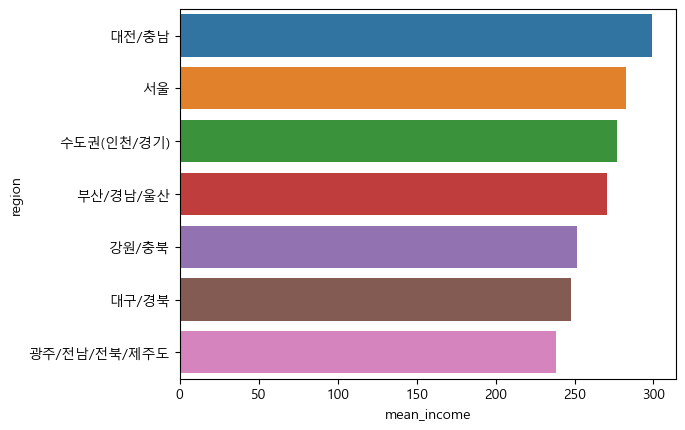

In [32]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

sns.barplot(data = location_income, y = 'region', x = 'mean_income')